In [153]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


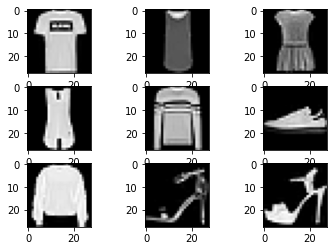

In [3]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

Метки: Футболка/топ, Брюк, Пуловер, Платье, Пальто, Сандалия, Рубашка, Кед, Сумка, Полусапожки.

In [4]:
X_train.min(), X_train.max()

(0, 255)

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.min(), X_train.max()

(0.0, 1.0)

In [6]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [10]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

<font size = 4><div style="text-align: justify">**Домашнее задание:**</div></font>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

<font size = 4><div style="text-align: justify">**Задание 1:**</div></font>

<font size = 2><div style="text-align: justify">**Сеть в 2 слоя:**</div></font>

In [7]:
model = Sequential()
model.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20
235/235 [==============================] - 2s 4ms/step - loss: 1.5296 - accuracy: 0.5323 - val_loss: 1.0540 - val_accuracy: 0.6749
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.8845 - accuracy: 0.7193 - val_loss: 0.7932 - val_accuracy: 0.7332
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.7222 - accuracy: 0.7613 - val_loss: 0.6981 - val_accuracy: 0.7582
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6465 - accuracy: 0.7850 - val_loss: 0.6425 - val_accuracy: 0.7792
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5997 - accuracy: 0.7992 - val_loss: 0.6110 - val_accuracy: 0.7917
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5672 - accuracy: 0.8094 - val_loss: 0.5803 - val_accuracy: 0.7995
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5433 - accuracy: 0.8168 - val_loss: 0.5597 - val_accuracy: 0.8074
Epoch 

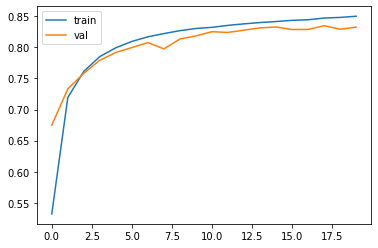

In [12]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

In [13]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.8323


(0.4797327518463135, 0.8323000073432922)

In [49]:
labels = {'labels':
          ["Футболка/топ", 
           "Брюки", 
           "Пуловер", 
           "Платье", 
           "Пальто", 
           "Сандаль", 
           "Рубашка", 
           "Кед", 
           "Сумка", 
           "Полусапожки"]}

df_labels = pd.DataFrame(labels)
df_labels

,labels
0,Футболка/топ
1,Брюки
2,Пуловер
3,Платье
4,Пальто
5,Сандаль
6,Рубашка
7,Кед
8,Сумка
9,Полусапожки


1/1 [==============================] - 0s 18ms/step
Предсказание нейронной сети: 
Полусапожки


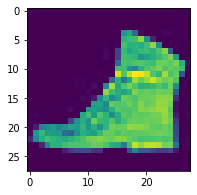

In [60]:
ind = np.random.randint(0, X_test.shape[0])
test_img = X_test[ind]
plt.figure(figsize=(3, 3))
plt.imshow(test_img.reshape([28,28]))

X_test[0][None].shape
predict = model.predict(X_test[ind][None])
pred_label = np.argmax(predict, axis=1)

print("Предсказание нейронной сети: ")

for j in range(0, 10, 1):
    if pred_label == j:
        lab = df_labels.loc[j][0]
        print(lab)

<font size = 2><div style="text-align: justify">**Изменение числа нейронов:**</div></font>

In [61]:
model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [63]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20
235/235 [==============================] - 2s 4ms/step - loss: 1.6134 - accuracy: 0.5375 - val_loss: 1.1022 - val_accuracy: 0.6518
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.9084 - accuracy: 0.6946 - val_loss: 0.8157 - val_accuracy: 0.7083
Epoch 3/20
235/235 [==============================] - 1s 2ms/step - loss: 0.7393 - accuracy: 0.7486 - val_loss: 0.7150 - val_accuracy: 0.7535
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6633 - accuracy: 0.7787 - val_loss: 0.6541 - val_accuracy: 0.7808
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6147 - accuracy: 0.7944 - val_loss: 0.6146 - val_accuracy: 0.7907
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5804 - accuracy: 0.8038 - val_loss: 0.5894 - val_accuracy: 0.7936
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.8118 - val_loss: 0.5750 - val_accuracy: 0.7975
Epoch 

In [64]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.8343


(0.4694163203239441, 0.8342999815940857)

Псоле снижения числа нейронов в 2 раза, метрики изменились несущественно.

In [65]:
model = Sequential()
model.add(Dense(500, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 250)               125250    
                                                                 
 dense_8 (Dense)             (None, 10)                2510      
                                                                 
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [67]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 1.2058 - accuracy: 0.6463 - val_loss: 0.8486 - val_accuracy: 0.7259
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.7371 - accuracy: 0.7645 - val_loss: 0.6869 - val_accuracy: 0.7738
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 0.6317 - accuracy: 0.7954 - val_loss: 0.6219 - val_accuracy: 0.7956
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.5757 - accuracy: 0.8095 - val_loss: 0.5794 - val_accuracy: 0.8069
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.5404 - accuracy: 0.8214 - val_loss: 0.5500 - val_accuracy: 0.8131
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 0.5156 - accuracy: 0.8276 - val_loss: 0.5310 - val_accuracy: 0.8179
Epoch 7/20
235/235 [==============================] - 2s 8ms/step - loss: 0.4966 - accuracy: 0.8318 - val_loss: 0.5175 - val_accuracy: 0.8215
Epoch 

In [68]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.8462


(0.43558061122894287, 0.8461999893188477)

Псоле увеличения числа нейронов, метрики стали лучше, но несущественно.

<font size = 2><div style="text-align: justify">**Изменение слоев сети:**</div></font>

In [69]:
model = Sequential()
model.add(Dense(500, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 500)               392500    
                                                                 
 dense_10 (Dense)            (None, 250)               125250    
                                                                 
 dense_11 (Dense)            (None, 125)               31375     
                                                                 
 dense_12 (Dense)            (None, 60)                7560      
                                                                 
 dense_13 (Dense)            (None, 10)                610       
                                                                 
Total params: 557,295
Trainable params: 557,295
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [71]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20
235/235 [==============================] - 3s 10ms/step - loss: 1.5281 - accuracy: 0.5356 - val_loss: 0.9268 - val_accuracy: 0.6750
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.7707 - accuracy: 0.7370 - val_loss: 0.7078 - val_accuracy: 0.7613
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 0.6392 - accuracy: 0.7873 - val_loss: 0.6220 - val_accuracy: 0.7937
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.5755 - accuracy: 0.8047 - val_loss: 0.5705 - val_accuracy: 0.8062
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.5345 - accuracy: 0.8166 - val_loss: 0.5557 - val_accuracy: 0.8071
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.5092 - accuracy: 0.8237 - val_loss: 0.6473 - val_accuracy: 0.7467
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.4900 - accuracy: 0.8299 - val_loss: 0.5535 - val_accuracy: 0.8114
Epoc

In [72]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.8196


(0.5018786787986755, 0.819599986076355)

При увеличении числа слоев до 4, метрика на обучение стала чуть лучше, но на тесте наблюдается снижение метрики, что говорит о переобучении.

In [73]:
model = Sequential()
model.add(Dense(500, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(450, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 500)               392500    
                                                                 
 dense_15 (Dense)            (None, 450)               225450    
                                                                 
 dense_16 (Dense)            (None, 400)               180400    
                                                                 
 dense_17 (Dense)            (None, 350)               140350    
                                                                 
 dense_18 (Dense)            (None, 300)               105300    
                                                                 
 dense_19 (Dense)            (None, 250)               75250     
                                                                 
 dense_20 (Dense)            (None, 200)              

In [74]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [75]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20
235/235 [==============================] - 5s 19ms/step - loss: 2.2427 - accuracy: 0.3056 - val_loss: 2.0896 - val_accuracy: 0.4840
Epoch 2/20
235/235 [==============================] - 5s 19ms/step - loss: 1.4077 - accuracy: 0.5598 - val_loss: 1.3233 - val_accuracy: 0.4931
Epoch 3/20
235/235 [==============================] - 5s 19ms/step - loss: 0.8350 - accuracy: 0.6749 - val_loss: 0.9215 - val_accuracy: 0.6556
Epoch 4/20
235/235 [==============================] - 4s 18ms/step - loss: 0.7043 - accuracy: 0.7367 - val_loss: 0.6504 - val_accuracy: 0.7612
Epoch 5/20
235/235 [==============================] - 4s 17ms/step - loss: 0.6151 - accuracy: 0.7728 - val_loss: 0.5948 - val_accuracy: 0.7827
Epoch 6/20
235/235 [==============================] - 4s 17ms/step - loss: 0.5632 - accuracy: 0.7963 - val_loss: 0.6895 - val_accuracy: 0.7385
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 0.5298 - accuracy: 0.8108 - val_loss: 0.5914 - val_accuracy: 0.7886

In [76]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 5ms/step - loss: 0.4098 - accuracy: 0.8516


(0.40979135036468506, 0.8515999913215637)

При увеличении числа слоев до 10, метрика на обучение стала еще лучше, на тесте также наблюдается рост метрики. Таким образом, число слоев влияет на качество модели, но может привести к переобучении. При 10 слоях переобучение не наблюдается.

<font size = 4><div style="text-align: justify">**Задание 2:**</div></font>

<font size = 2><div style="text-align: justify">**SGD:**</div></font>

In [77]:
model = Sequential()
model.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               100480    
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [79]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 1.4804 - accuracy: 0.5446 - val_loss: 1.0053 - val_accuracy: 0.6826
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.8524 - accuracy: 0.7194 - val_loss: 0.7817 - val_accuracy: 0.7351
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.7071 - accuracy: 0.7646 - val_loss: 0.6845 - val_accuracy: 0.7674
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6352 - accuracy: 0.7882 - val_loss: 0.6330 - val_accuracy: 0.7836
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5901 - accuracy: 0.8015 - val_loss: 0.5970 - val_accuracy: 0.7965
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5591 - accuracy: 0.8116 - val_loss: 0.5765 - val_accuracy: 0.7977
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5362 - accuracy: 0.8184 - val_loss: 0.5563 - val_accuracy: 0.8081
Epoch 

In [80]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.8394


(0.4651797413825989, 0.8393999934196472)

<font size = 2><div style="text-align: justify">**Adam:**</div></font>

In [81]:
model = Sequential()
model.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [83]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20
235/235 [==============================] - 2s 4ms/step - loss: 0.6085 - accuracy: 0.7969 - val_loss: 0.4584 - val_accuracy: 0.8419
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4091 - accuracy: 0.8571 - val_loss: 0.4371 - val_accuracy: 0.8459
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3658 - accuracy: 0.8705 - val_loss: 0.3954 - val_accuracy: 0.8612
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3406 - accuracy: 0.8782 - val_loss: 0.3758 - val_accuracy: 0.8671
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3178 - accuracy: 0.8848 - val_loss: 0.3604 - val_accuracy: 0.8734
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3023 - accuracy: 0.8904 - val_loss: 0.3498 - val_accuracy: 0.8777
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2915 - accuracy: 0.8938 - val_loss: 0.3550 - val_accuracy: 0.8769
Epoch 

In [84]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8814


(0.34920215606689453, 0.8813999891281128)

<font size = 2><div style="text-align: justify">**RMSProp:**</div></font>

In [85]:
model = Sequential()
model.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               100480    
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [87]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.6501 - accuracy: 0.7701 - val_loss: 0.5041 - val_accuracy: 0.8222
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4369 - accuracy: 0.8433 - val_loss: 0.4762 - val_accuracy: 0.8269
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3838 - accuracy: 0.8590 - val_loss: 0.4481 - val_accuracy: 0.8326
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3533 - accuracy: 0.8710 - val_loss: 0.4269 - val_accuracy: 0.8489
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3307 - accuracy: 0.8786 - val_loss: 0.4086 - val_accuracy: 0.8526
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.8845 - val_loss: 0.3970 - val_accuracy: 0.8548
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3003 - accuracy: 0.8897 - val_loss: 0.4654 - val_accuracy: 0.8347
Epoch 

In [88]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8810


(0.34840282797813416, 0.8809999823570251)

Самые лучшие метрики наблюдаются при использовании оптимизаторов Adam и RMSProp.

<font size = 4><div style="text-align: justify">**Задание 3:**</div></font>

<font size = 2><div style="text-align: justify">**Вывод:**</div></font>

Качество классификации улучшается за счет:
1. Увеличения нейронов в сети.
2. Увеличения слоев в сети.
3. Изменения оптимизатора (например, на Adam).

<font size = 4><div style="text-align: justify">**Задание 4 (для последнего варианта с optimizer='rmsprop'):**</div></font>

In [110]:
X_test[0][None].shape
predict = model.predict(X_test)
y_pred = np.argmax(predict, axis=1)

313/313 [==============================] - 0s 1ms/step


In [111]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [112]:
y_test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [113]:
df = pd.DataFrame({'y_test_labels': y_test_labels, 'y_pred': y_pred})
df

,y_test_labels,y_pred
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


In [148]:
df_1 = df.copy()

In [149]:
b1_all = []
b2_all = []

for j in range(0, 10000, 1):
    b1 = str(df_1['y_test_labels'][j])
    b1_all.append(b1)
    b2 = str(df_1['y_pred'][j])
    b2_all.append(b2)
    

df_1['y_test_labels'] = b1_all
df_1['y_pred'] = b2_all

In [150]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   y_test_labels  10000 non-null  object
 1   y_pred         10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [176]:
import sklearn.metrics

mkm = sklearn.metrics.multilabel_confusion_matrix(df_1['y_test_labels'], 
                                                  df_1['y_pred'], 
                                                  labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
#print(mkm)
print("Футболка/топ: \n", np.flip(mkm[0]))
print("Acc:", np.flip(mkm[0][1][1])/1000)
print("----------------")
print("Брюки: \n", np.flip(mkm[1]))
print("Acc:", np.flip(mkm[1][1][1])/1000)
print("----------------")
print("Пуловер: \n", np.flip(mkm[2]))
print("Acc:", np.flip(mkm[2][1][1])/1000)
print("----------------")
print("Платье: \n", np.flip(mkm[3]))
print("Acc:", np.flip(mkm[3][1][1])/1000)
print("----------------")
print("Пальто: \n", np.flip(mkm[4]))
print("Acc:", np.flip(mkm[4][1][1])/1000)
print("----------------")
print("Сандали: \n", np.flip(mkm[5]))
print("Acc:", np.flip(mkm[5][1][1])/1000)
print("----------------")
print("Рубашка: \n", np.flip(mkm[6]))
print("Acc:", np.flip(mkm[6][1][1])/1000)
print("----------------")
print("Кеды: \n", np.flip(mkm[7]))
print("Acc:", np.flip(mkm[7][1][1])/1000)
print("----------------")
print("Сумка: \n", np.flip(mkm[8]))
print("Acc:", np.flip(mkm[8][1][1])/1000)
print("----------------")
print("Полусапожки: \n", np.flip(mkm[9]))
print("Acc:", np.flip(mkm[9][1][1])/1000)
print("----------------")

#acc = sklearn.metrics.accuracy_score(y_true, y_pred)

Футболка/топ: 
 [[ 855  145]
 [ 212 8788]]
Acc: 0.855
----------------
Брюки: 
 [[ 962   38]
 [   5 8995]]
Acc: 0.962
----------------
Пуловер: 
 [[ 818  182]
 [ 267 8733]]
Acc: 0.818
----------------
Платье: 
 [[ 879  121]
 [  86 8914]]
Acc: 0.879
----------------
Пальто: 
 [[ 850  150]
 [ 261 8739]]
Acc: 0.85
----------------
Сандали: 
 [[ 960   40]
 [  18 8982]]
Acc: 0.96
----------------
Рубашка: 
 [[ 585  415]
 [ 192 8808]]
Acc: 0.585
----------------
Кеды: 
 [[ 955   45]
 [  45 8955]]
Acc: 0.955
----------------
Сумка: 
 [[ 979   21]
 [  60 8940]]
Acc: 0.979
----------------
Полусапожки: 
 [[ 967   33]
 [  44 8956]]
Acc: 0.967
----------------


Интерпретация (на примере футболок/топиков):

Из 1000 футболок 855 предсказано верно и 145 неверно. Из 10000 одежды и аксессуаров 212 были названы сетью ошибочно футболками. 

Наибольшие ошибки наблюдаются у классов "футболка/топ", "полувер", "пальто", "рубашка". Скорее всего, это связано с тем, что эти виды одежды образно похожи друг на друга, например, рубашка может быть похожа на полувер, футболку (рубашка с короткими рукавами).